# Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing the Data

In [2]:
df = pd.read_csv(r"churn.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Understanding the Data

In [5]:
df.shape

(10000, 14)

In [6]:
df.columns 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info() # Now let's see the data types of all 14 columns and non-null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Unique values in each Column

In [8]:
df.nunique() 

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# Null Value Check

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Duplication Check

In [10]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Numerical Columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# Categorical Columns

In [12]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Pre-Processing of Data

# Dropping insignificant columns

In [13]:
df.drop(columns= ['RowNumber','CustomerId','Surname'],inplace=True)

# Correlation Check

In [14]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


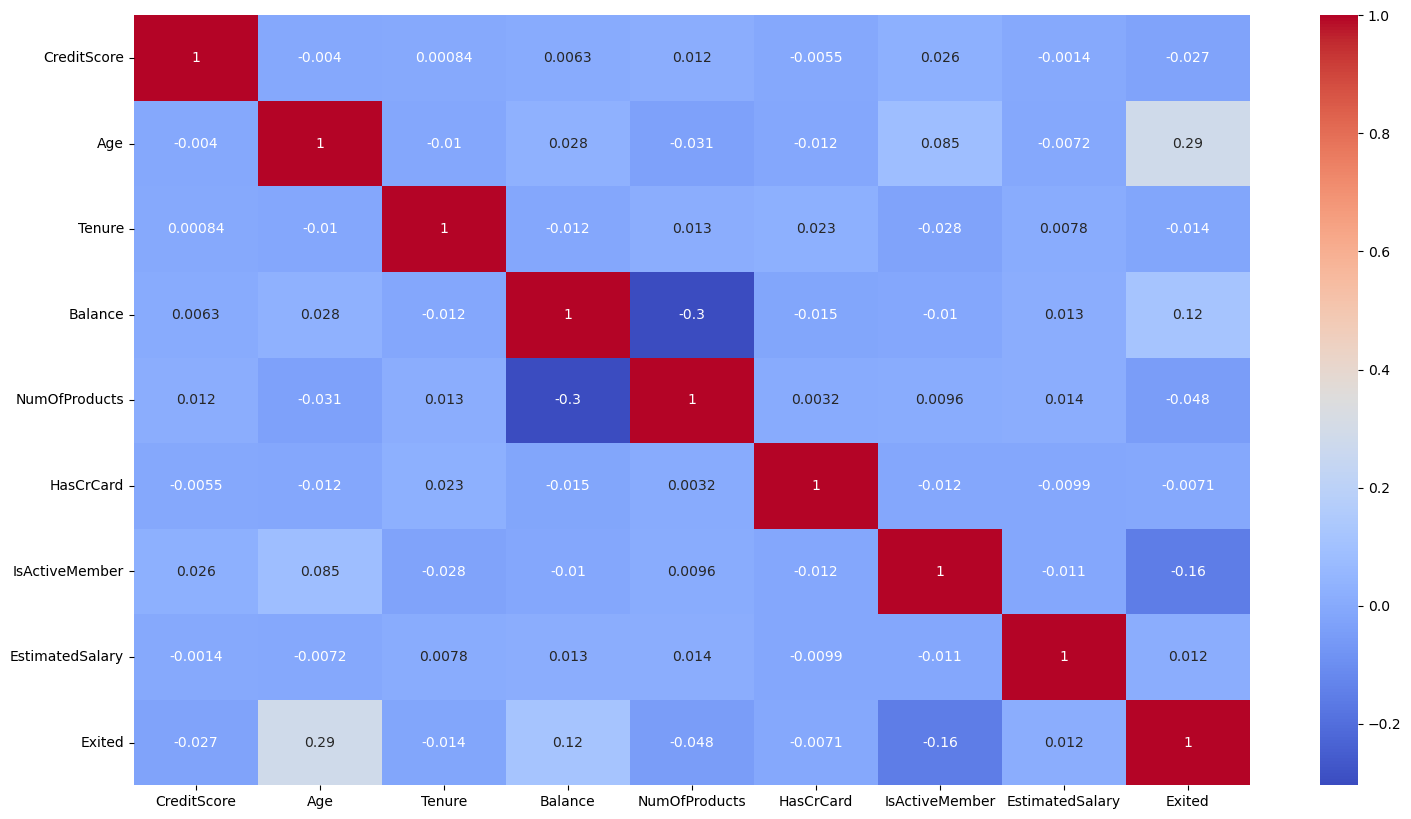

In [15]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),yticklabels=True,cbar=True,cmap='coolwarm',annot=True)
plt.show()

No two columns show a correlation greater than 0.75. So as theoretically suggested, we are good to go
here.

# Transforming Estimated Salary Column (For EDA)

In [16]:
conditions = [
 (df['EstimatedSalary'] <= 25000),
 (df['EstimatedSalary'] > 25000) & (df['EstimatedSalary'] <= 50000),
 (df['EstimatedSalary'] > 50000) & (df['EstimatedSalary'] <= 75000),
 (df['EstimatedSalary'] > 75000) & (df['EstimatedSalary'] <= 100000),
 (df['EstimatedSalary'] > 100000) & (df['EstimatedSalary'] <= 125000),
 (df['EstimatedSalary'] > 125000) & (df['EstimatedSalary'] <= 150000),
 (df['EstimatedSalary'] > 150000) & (df['EstimatedSalary'] <= 1750000),
 (df['EstimatedSalary'] > 175000) & (df['EstimatedSalary'] <= 200000)
]
values = ['Less than 25000', '25,000-50,000','50,000-75,000','75,000-1,00,000','1,00,000-1,25,000',
 '1,25,000-1,50,000','1,50,000-1,75,000','1,75,000-2,00,000' ]
df['SalaryRange'] = np.select(conditions, values)


In [17]:
df['SalaryRange'].value_counts()

1,50,000-1,75,000    2455
1,25,000-1,50,000    1279
1,00,000-1,25,000    1276
50,000-75,000        1269
75,000-1,00,000      1268
25,000-50,000        1236
Less than 25000      1217
Name: SalaryRange, dtype: int64

# Transforming Age Column (For EDA)

In [18]:
conditions = [
 (df['Age'] >= 0) & (df['Age'] <= 18),
 (df['Age'] >= 18) & (df['Age'] < 30),
 (df['Age'] >= 30) & (df['Age'] < 40),
 (df['Age'] >= 40) & (df['Age'] < 50),
 (df['Age'] >= 50) & (df['Age'] < 60),
 (df['Age'] >= 60)
]
values = ['Minors', '18-30', '30-40','40-50','50-60','>60']
df['AgeGroup'] = np.select(conditions, values)

In [19]:
df.AgeGroup.value_counts()

30-40     4346
40-50     2618
18-30     1619
50-60      869
>60        526
Minors      22
Name: AgeGroup, dtype: int64

# Univariate Analysis

<Figure size 6000x10000 with 0 Axes>

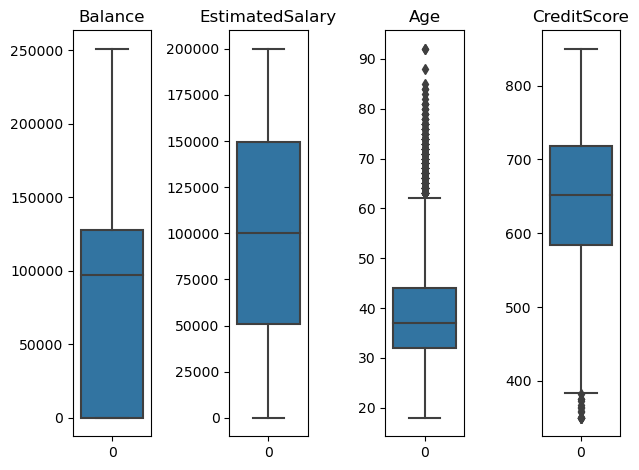

In [20]:
plt.figure(figsize=(60, 100))
# Store the list of columns
columns_to_plot = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']
# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))
# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
 sns.boxplot(data=df[column], ax=axis)
 axis.set_title(column)
# Show the plot
plt.tight_layout()
plt.show()

Age column is skewed.

In [21]:
# Right skewed
df['Age'].skew() 

1.0113202630234552

In [22]:
# Log transformation to handle right skewed data
df['Age1'] = np.log(df['Age'])

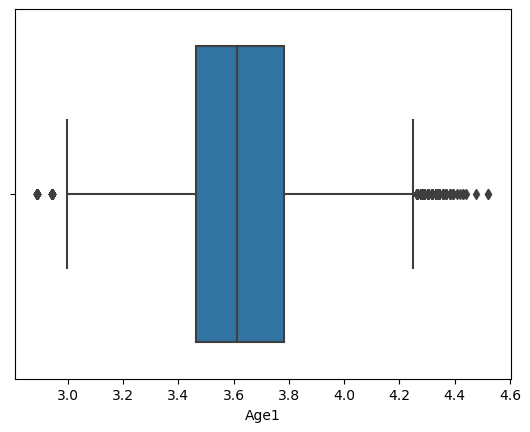

In [23]:
# After log transformation
sns.boxplot(x=df['Age1'])
plt.show()

# Bivariate Analysis

Here our main interest is to get an understanding as to how the given attributes relate
to the 'Exit' status

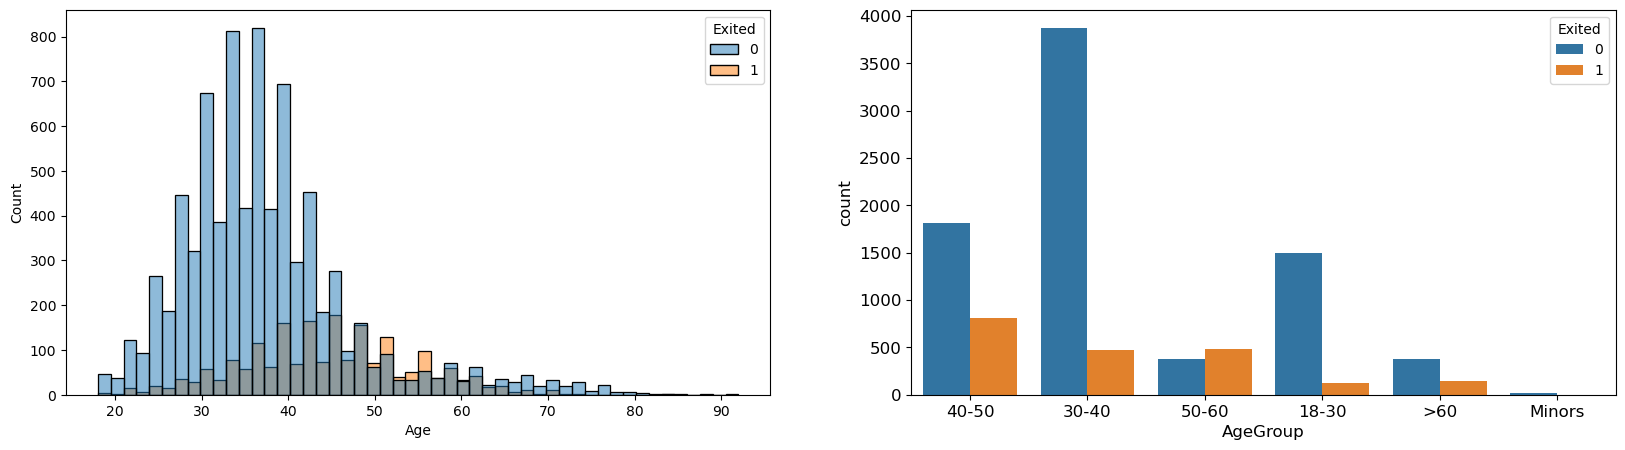

In [24]:
fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Age',hue='Exited',bins=50,ax=axarr[0])
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.countplot(data=df,x ='AgeGroup',hue='Exited',ax=axarr[1])
plt.show()

# Insight: 
40-50 is the age group for which churn rate is maximum. Also for age group
50-60 customers churned is more than customer retention.The bank may need to
review their target market or review the strategy for retention between the different
age groups


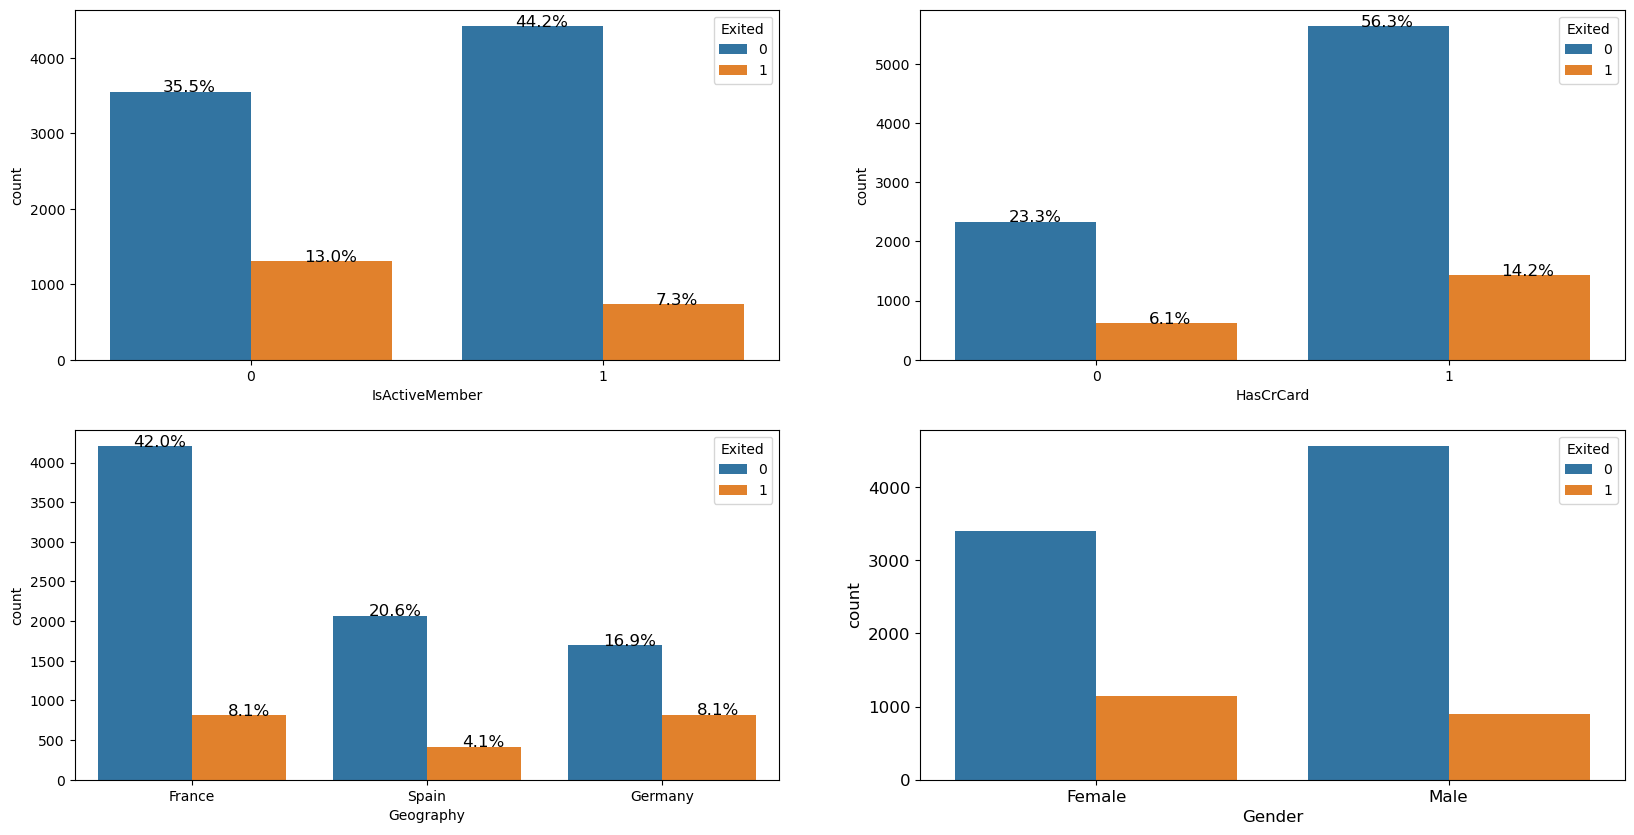

In [25]:
fig, axarr = plt.subplots(2,2, figsize=(20, 10))
plt.xticks(size=12)
plt.xlabel('Is Active Member (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='IsActiveMember',hue='Exited',ax=axarr[0][0])
total = len(df['IsActiveMember'])
for p in ax.patches:
 percentage = '{:.1f}%'.format(100 * p.get_height()/total)
 x = p.get_x() + p.get_width() / 2 - 0.05
 y = p.get_y() + p.get_height()
 ax.annotate(percentage, (x, y), size = 12)
plt.xticks(size=12)
plt.xlabel('Has Credit Card (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='HasCrCard',hue='Exited',ax=axarr[0][1])
total = len(df['HasCrCard'])
for p in ax.patches:
 percentage = '{:.1f}%'.format(100 * p.get_height()/total)
 x = p.get_x() + p.get_width() / 2 - 0.05
 y = p.get_y() + p.get_height()
 ax.annotate(percentage, (x, y), size = 12)
plt.xticks(size=12)
plt.xlabel('Geography',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='Geography',hue='Exited',ax=axarr[1][0])
total = len(df['Geography'])
for p in ax.patches:
 percentage = '{:.1f}%'.format(100 * p.get_height()/total)
 x = p.get_x() + p.get_width() / 2 - 0.05
 y = p.get_y() + p.get_height()
 ax.annotate(percentage, (x, y), size = 12)

plt.xticks(size=12)
plt.xlabel('Gender',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.countplot(data=df,x='Gender',hue='Exited',ax=axarr[1][1])
plt.show()

# Insight:
1. Chances of a non-active member churning out is double the chances of an active member churning out.
Bank needs to check with the customers for being inactive , give them some offers plan.
2. Majority of the customers that churned are those with credit cards. Given that majority of the customers
have credit cards could prove this to be just a coincidence.
3. Almost half of the customers are from France followed by Spain and Germany each having 25%
customers.Hence churn rate is also maximum for France there but Germany showed the same churn
rate despite lower count of customers.
4. Male to female ratio of customers is 5:4.Clearly as observed churn probability is more for a female
customer.


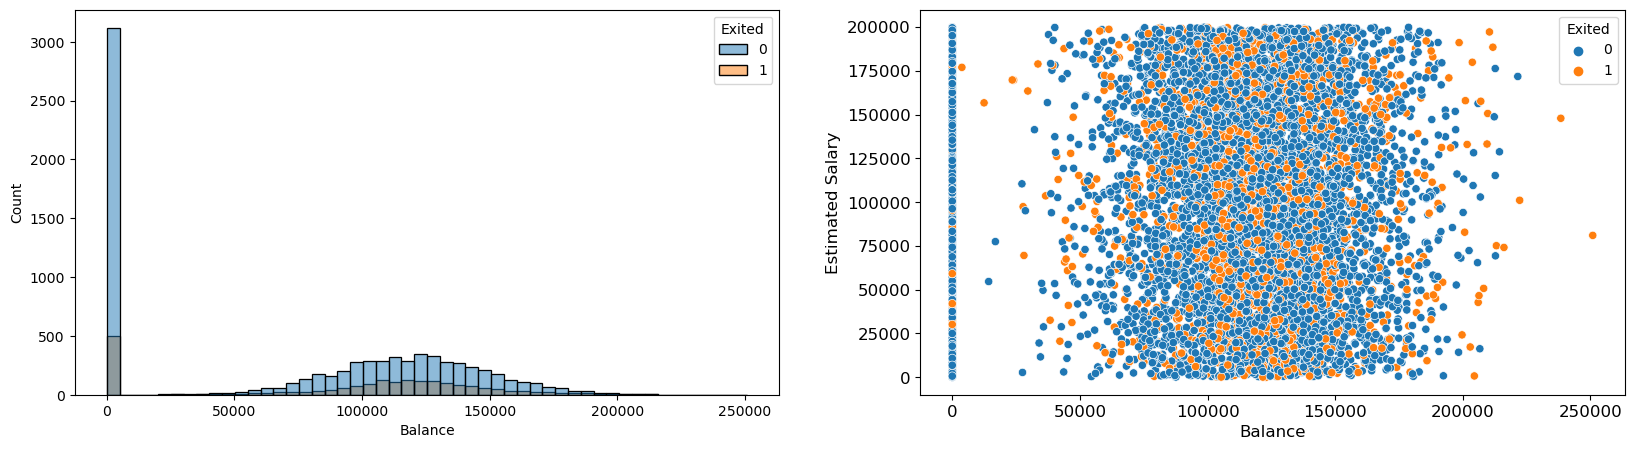

In [26]:
fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Balance',hue='Exited',bins=50,ax = axarr[0])
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Estimated Salary',size=12)
sns.scatterplot(data=df,x='Balance',y='EstimatedSalary',hue='Exited',ax=axarr[1])
plt.show()

# Insight: 
Probability of customers having zero balance churning out is maximum.Many
people keep 0 balance no matter how high or low their estimated salary is.


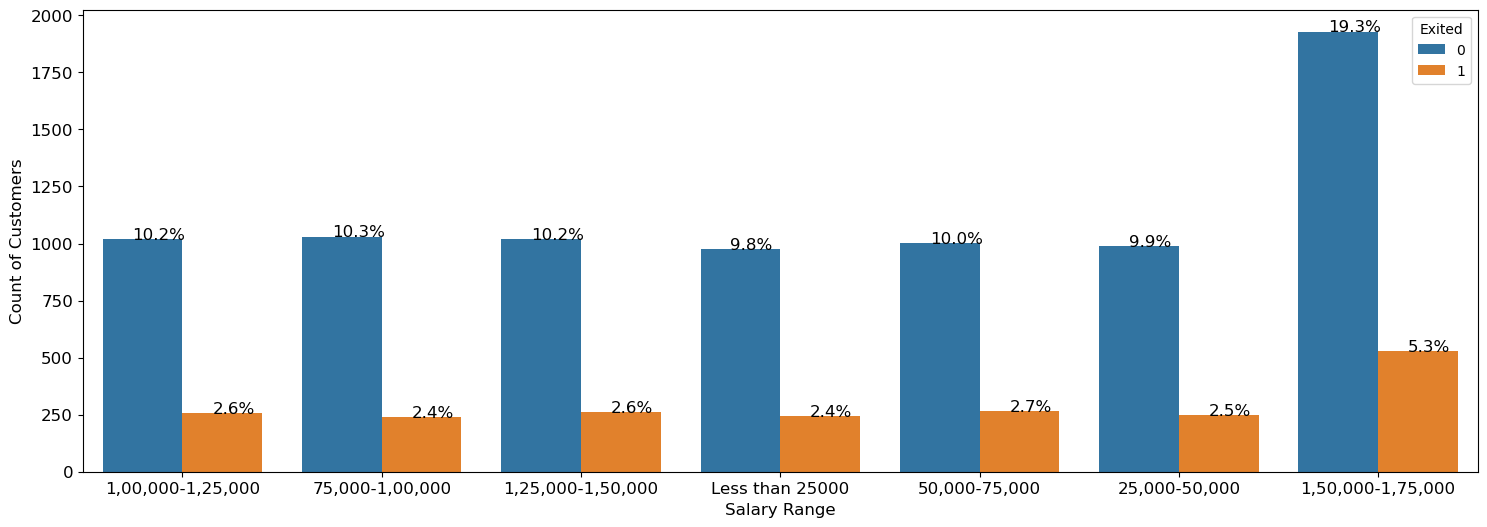

In [27]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='SalaryRange',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Salary Range',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['SalaryRange'])
for p in ax.patches:
 percentage = '{:.1f}%'.format(100 * p.get_height()/total)
 x = p.get_x() + p.get_width() / 2 - 0.05
 y = p.get_y() + p.get_height()
 ax.annotate(percentage, (x, y), size = 12)
plt.show()

# Insight:
Around one-fourth customers have salary between 150000-175000 and more
churn rate for these customers is observed which shows bank is losing it's valuable
customers.

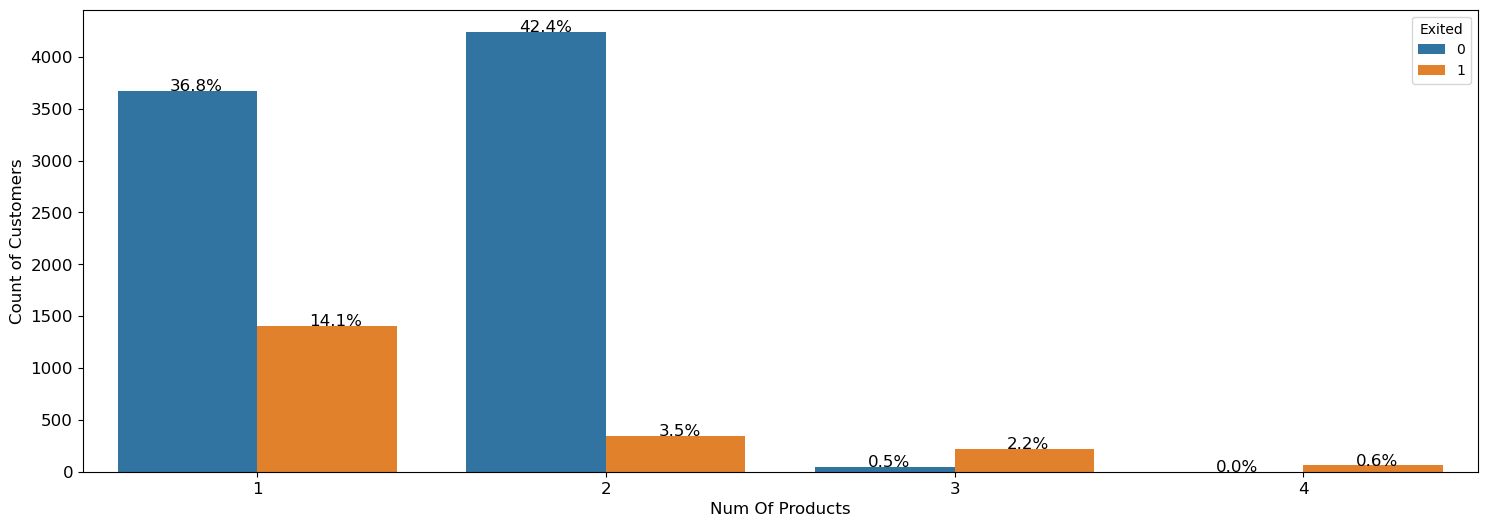

In [28]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='NumOfProducts',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Num Of Products',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['NumOfProducts'])
for p in ax.patches:
 percentage = '{:.1f}%'.format(100 * p.get_height()/total)
 x = p.get_x() + p.get_width() / 2 - 0.05
 y = p.get_y() + p.get_height()
 ax.annotate(percentage, (x, y), size = 12)
plt.show()

# Insight:
Maximum customers who churned out have used 1 product only (14% out of
total 20%). Maybe bank needs to focus on convincing customers to use more of their
services and products.

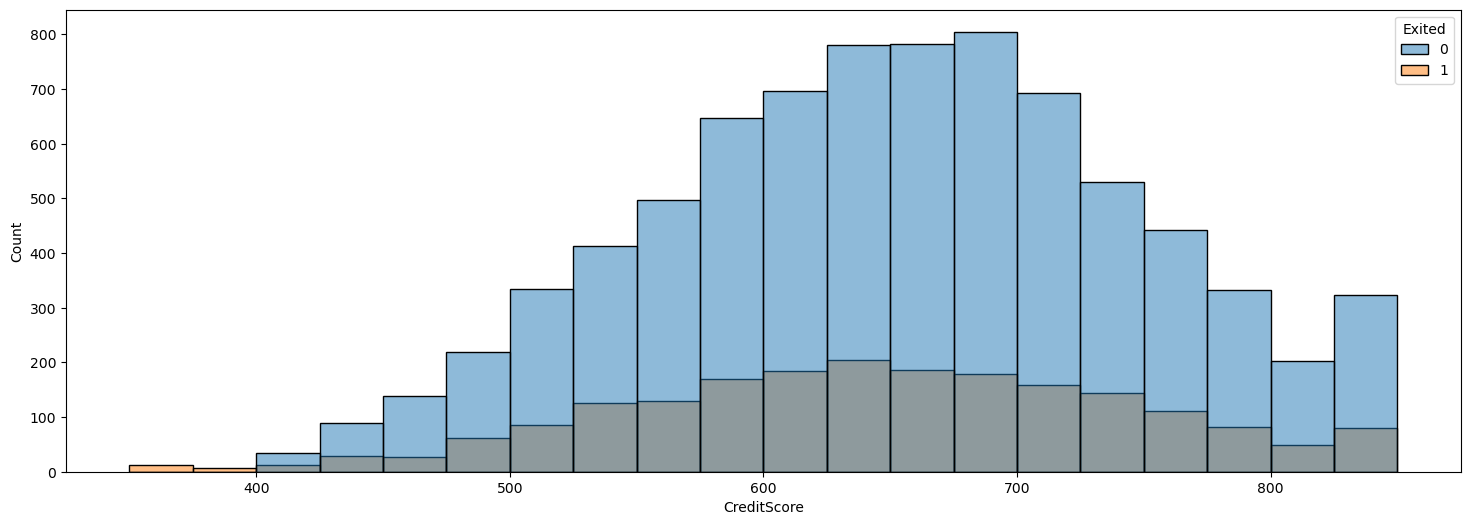

In [29]:
plt.figure(figsize=(18,6))
sns.histplot(data=df,x='CreditScore',bins=20,hue='Exited')
plt.show()

There is no significant difference in the credit score distribution between retained and
churned customers.

In [30]:
# Drop the columns formed for EDA as it's no longer needed. Also drop age and keep logar
df.drop(columns=['SalaryRange','AgeGroup','Age'],inplace=True)

Target check for balanced or Imbalanced data

In [31]:
round(df['Exited'].value_counts()/len(df)*100,2)

0    79.63
1    20.37
Name: Exited, dtype: float64

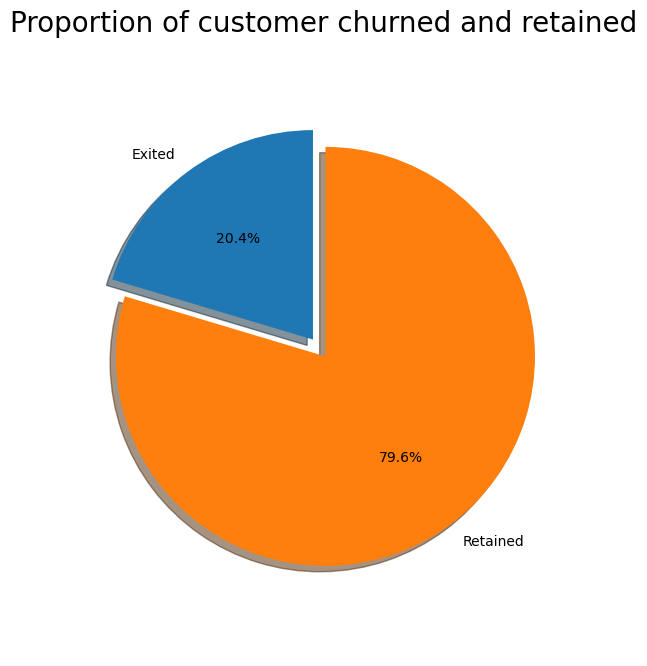

In [32]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6 , 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
 shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# Insight:
80 percent of the data belongs to retained class .It is Imbalanced data .
Solution : Use SMOTE to handle this or the Precision -Recall curve should
be used not accuracy .